<a href="https://colab.research.google.com/github/cyrus-rule/Data-Science-/blob/main/CyruRuleU5proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports :)
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import xarray as xr
import pymc as pm

from scipy.interpolate import PchipInterpolator

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U5proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU5proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU5proj.ipynb"

# Unit 5 Project: Making a Generalized Linear Model (1 predictor)

**Task**:

Two parts:

1. Propose a data set that's compatible with a generalized linear model structure built with pymc. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a generalized linear model using pymc within the colab environment, on a data set of your choice.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Linear models are generalized linear models. This is not a competition to come up with the most complicated heirearchical glm. **Find a data set that interests you, and apply the simplest model that captures the patterns in the data.**

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit5NotesAK *is* your example! You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- Its ok to pick a data set for which you don't qute understand the context--so long as you think the context is cool.


So, in basketball, one might expect that the players who are paid more will be more efficient. Let's test this! Salary can be tracked using salary, and I will be quanitifying good at basketball-ness using Win Shares per 48, which is an estimate of the wins a player contributes through their play per 48 minutes of play (the length of one game). It's a pretty good numbe that tells us how much a player is helping their team win when they are playing. For reference, the average WS/48 is about .100.

DATA!!!!

In [2]:

#load the data into a pandas dataframe, and print it
url_basketball = 'https://github.com/cyrus-rule/Data-Science-/raw/main/NBA%20Salaries%20%26%20Win%20Shares.csv'
#I could have put the url string directly into pd.read_csv()
basketball = pd.read_csv(url_basketball)


In [3]:
basketball

,Player,Salary,WS/48
0,A.J. Green,2120693,0.109
1,Aaron Gordon,22841455,0.180
2,Aaron Holiday,4668000,0.211
3,Aaron Nesmith,11000000,0.100
4,Aaron Wiggins,10514017,0.126
...,...,...,...
412,Zach Edey,5756880,0.179
413,Zach LaVine,43031940,0.083
414,Zeke Nnaji,8888889,-0.038
415,Ziaire Williams,6133005,0.040


Let's visualize

Text(0, 0.5, 'WS/48')

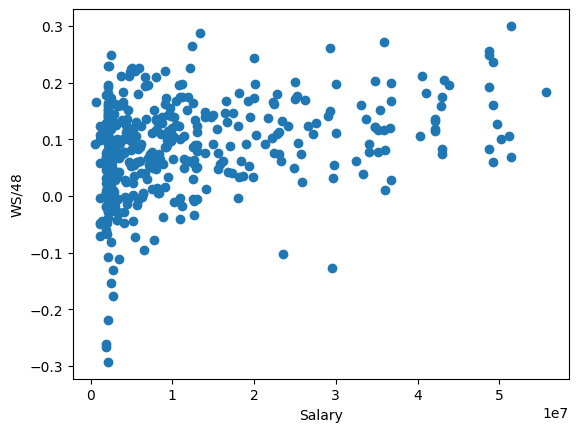

In [4]:
plt.scatter(basketball['Salary'] , basketball['WS/48'],)

#label axes
plt.xlabel("Salary")
plt.ylabel("WS/48")


So we do see an upward trend. Broadly, better paid  players do seem to be better (or at least more productive and efficient). However, that isn't the whole story. If you are very inefficient, you are very likely to be paid less, but high salary doesn't necessarily indicate very efficient play. The spread also seems to decrease over time though. I'm tempted to make something like a square root curve or a logarithmic curve, but I recognize that there is a massive cluster on the left between 0 & 0.2 WS/48, what looks like more spread or lower values on the left is not as strong as I would think. Instead, I'll start with linear model.

In [5]:
with pm.Model() as model_ld:

    #priors for our mean line
    #the default mean for a normal dist is 0, this is fine because the trend is kinda weak
    α = pm.Normal("α", sigma=10) #broad priors for these parameters
    β = pm.Normal("β", sigma=10) #these are for the mean

    #priors for the line for our standard deviation
    γ = pm.HalfNormal("γ", sigma=10)
    δ = pm.HalfNormal("δ", sigma=10)

    #mean line
    μ = pm.Deterministic("μ", α + β * basketball.Salary) # standard linear model

    #st dev line; I expect the data to vary more at the start
    σ = pm.Deterministic("σ", γ + δ * basketball['WS/48'])

    #normal likelihood
    y_pred = pm.Normal("y_pred", mu=μ, sigma=σ, observed=basketball['WS/48'])

    idata_ld = pm.sample()

Output()

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [6]:
pm.sample_posterior_predictive(idata_ld, model = model_ld, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='y_pred'>

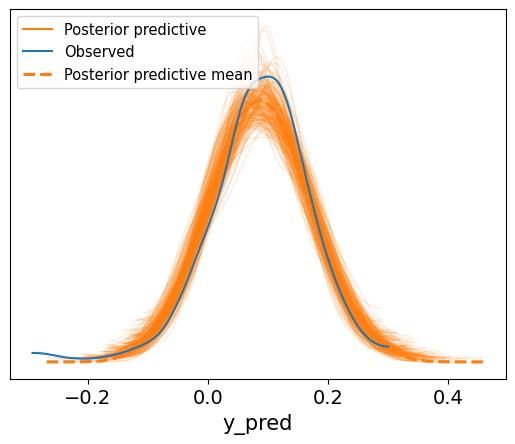

In [7]:
# posterior predictive check
az.plot_ppc(idata_ld, num_pp_samples=200, colors=["C1", "C0", "C1"])

Text(0, 0.5, 'WS/48')

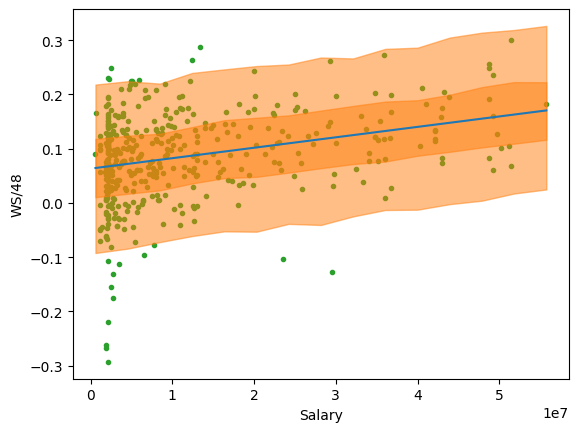

In [8]:
mean_line = idata_ld.posterior["μ"].mean(("chain", "draw"))
salaries = np.random.normal(basketball.Salary.values, 0.01)
idx = np.argsort(salaries)
x = np.linspace(salaries.min(), salaries.max(), 15)
y_pred_q = idata_ld.posterior_predictive["y_pred"].quantile(
    [0.03, 0.97, 0.25, 0.75], dim=["chain", "draw"]
)
y_hat_bounds = iter(
    [
        PchipInterpolator(salaries[idx], y_pred_q[i][idx])(x)
        for i in range(4)
    ]
)

_, ax = plt.subplots()
ax.plot(basketball.Salary, basketball['WS/48'], "C2.", zorder=-3)
ax.plot(basketball.Salary[idx], mean_line[idx], c="C0")

for lb, ub in zip(y_hat_bounds, y_hat_bounds):
    ax.fill_between(x, lb, ub, color="C1", alpha=0.5)

ax.set_xlabel("Salary")
ax.set_ylabel("WS/48")

So this is a slight trend here, but nothing super significant. That's likely because slary is just not a good predictor of win shares per 48 minutes. Both of these statistics have too many factors, and there isn't neccesarily that much overlap between those factors. I player can be paid highly for many reasons: fan appeal, playoff performance, productivity (not necessarily with efficiency) all effect salary and are not really captured in WS/48. Similarly, what does factor into WS/48, the amount you positively affect the basketball game per minute you play, doesn't necessarily imply you earn a high salary. The "stars" who get paid the most have reduced efficiency because they attract more attention from the other team and are a bigger part of the other team's scouting report, so WS/48 is not really an unbiased metric of "goodness."

I don't think that there is much I could do to make this model better just because there is not much of a relationship to speak of to begin with. That said, I do want to make the account for the way increased spread on the left of the data. It's currently treating all of the players on minimum contracts with negative win shares as outliers, when I feel like they should be predicted. If I was told that a player was paid the minimum, I would predict that they could have almost any WS/48, which is not what the model currently does. So, I'm gong to try making the standard deviation exponential instead of linear.

In [9]:
with pm.Model() as model_ld:

    #priors for our mean line
    #the default mean for a normal dist is 0, this is fine because the trend is kinda weak
    α = pm.Normal("α", sigma=10) #broad priors for these parameters
    β = pm.Normal("β", sigma=10) #these are for the mean

    #priors for the line for our standard deviation
    γ = pm.HalfNormal("γ", sigma=10)
    δ = pm.HalfNormal("δ", sigma=10)

    #mean line
    μ = pm.Deterministic("μ", α + β * basketball.Salary) # standard linear model

    #st dev line; I expect the data to vary more at the start
    σ = pm.Deterministic("σ", pm.math.exp(δ * basketball['WS/48']) + γ) #I want the standard deviation to start very high, and thn taper off to a constant γ value

    #normal likelihood
    y_pred = pm.Normal("y_pred", mu=μ, sigma=σ, observed=basketball['WS/48'])

    idata_ld = pm.sample()

Output()

Output()

In [10]:
pm.sample_posterior_predictive(idata_ld, model = model_ld, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

Text(0, 0.5, 'WS/48')

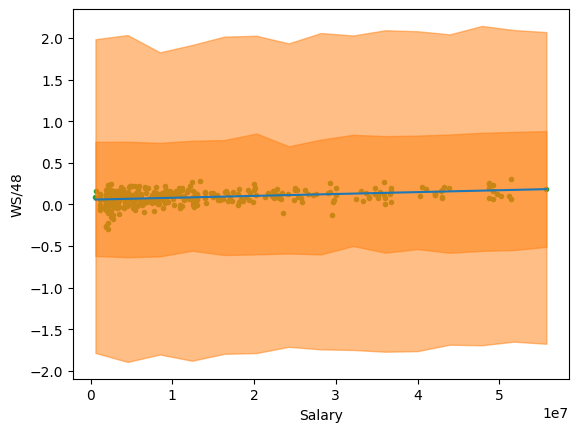

In [11]:
mean_line = idata_ld.posterior["μ"].mean(("chain", "draw"))
salaries = np.random.normal(basketball.Salary.values, 0.01)
idx = np.argsort(salaries)
x = np.linspace(salaries.min(), salaries.max(), 15)
y_pred_q = idata_ld.posterior_predictive["y_pred"].quantile(
    [0.03, 0.97, 0.25, 0.75], dim=["chain", "draw"]
)
y_hat_bounds = iter(
    [
        PchipInterpolator(salaries[idx], y_pred_q[i][idx])(x)
        for i in range(4)
    ]
)

_, ax = plt.subplots()
ax.plot(basketball.Salary, basketball['WS/48'], "C2.", zorder=-3)
ax.plot(basketball.Salary[idx], mean_line[idx], c="C0")

for lb, ub in zip(y_hat_bounds, y_hat_bounds):
    ax.fill_between(x, lb, ub, color="C1", alpha=0.5)

ax.set_xlabel("Salary")
ax.set_ylabel("WS/48")

<Axes: xlabel='y_pred'>

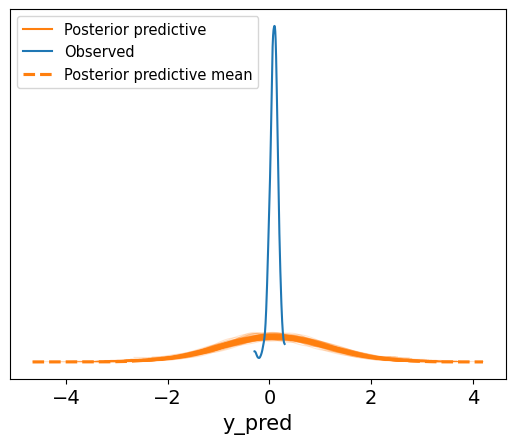

In [12]:
# posterior predictive check
az.plot_ppc(idata_ld, num_pp_samples=200, colors=["C1", "C0", "C1"])

Hmm, that really backfired. It seems I allowed for wayyyyyyy to much spread with my new model. My idea was to allow very high deviation at the start and then way less thereafter but that is not what actually happened. There was just a very high deviation the whole time.

Ok, so I have a better idea that might solve this

If i use this function for my standard deviation, I can have the value range asymptotically from γ + ε to γ at a rate determined by δ

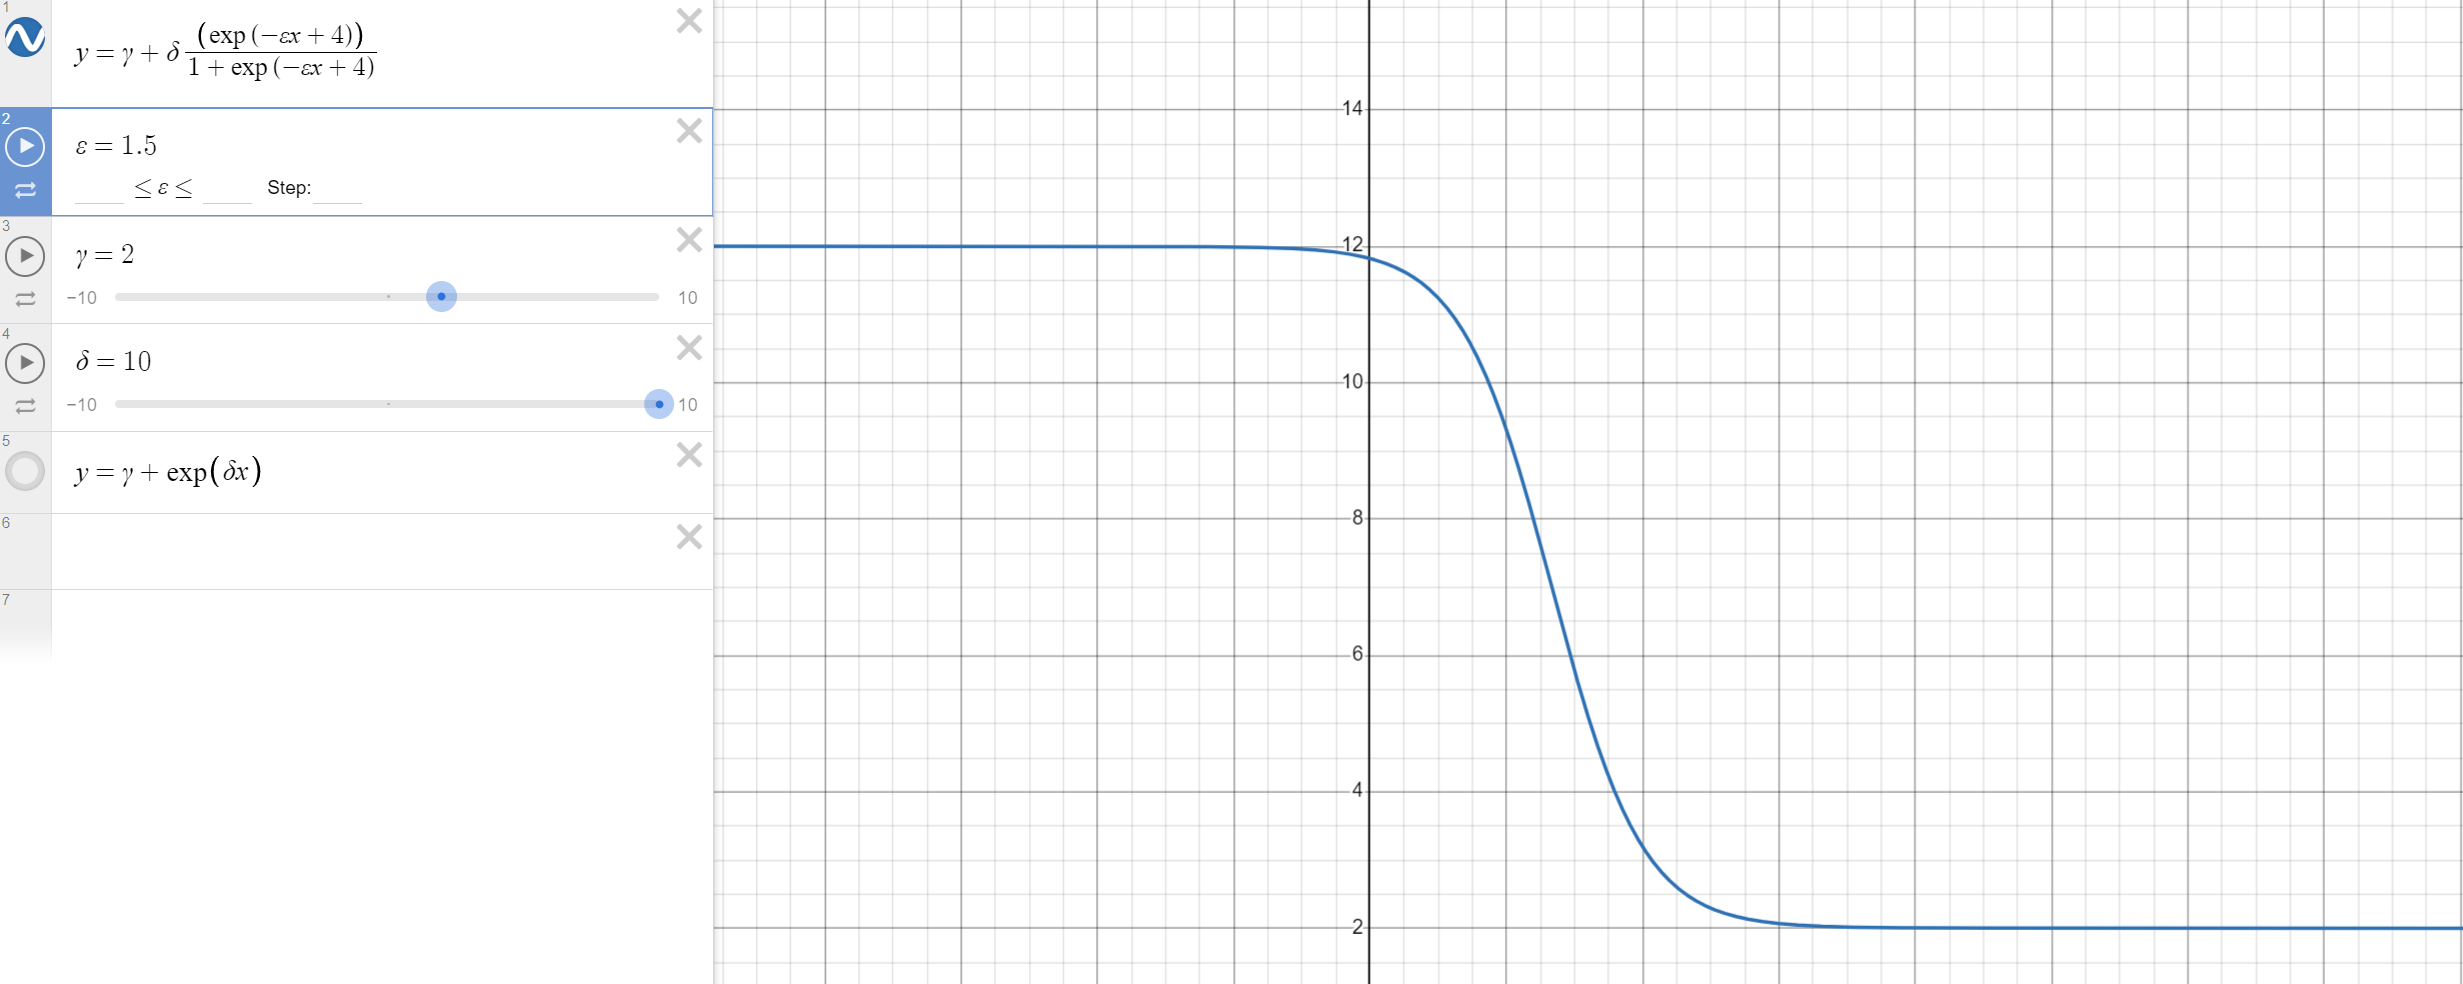

i will try to impliment this in one last model.

In [13]:
with pm.Model() as model_ld:

    #priors for our mean line
    #the default mean for a normal dist is 0, this is fine because the trend is kinda weak
    α = pm.Normal("α", sigma=10) #broad priors for these parameters
    β = pm.Normal("β", sigma=10) #these are for the mean

    #priors for the line for our variation
    γ = pm.HalfNormal("γ", sigma=10) # minimum variation
    δ = pm.HalfNormal("δ", sigma=10) # amount beyond minimum we start at (approximately)
    ε = pm.HalfNormal("ε", sigma=.001)  # Rate of change (this needs to be really small since our x values get so big)

    #mean line
    μ = pm.Deterministic("μ", α + β * basketball.Salary) # standard linear model

    #st dev line; I expect the data to vary more at the start
    σ = pm.Deterministic("σ", pm.math.exp(-ε * basketball["WS/48"] + 4) /
        (1 + pm.math.exp(-ε * basketball["WS/48"] + 4)))

    #normal likelihood
    y_pred = pm.Normal("y_pred", mu=μ, sigma=σ, observed=basketball['WS/48'])

    idata_ld = pm.sample()

Output()

Output()

In [15]:
pm.sample_posterior_predictive(idata_ld, model = model_ld, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

Text(0, 0.5, 'WS/48')

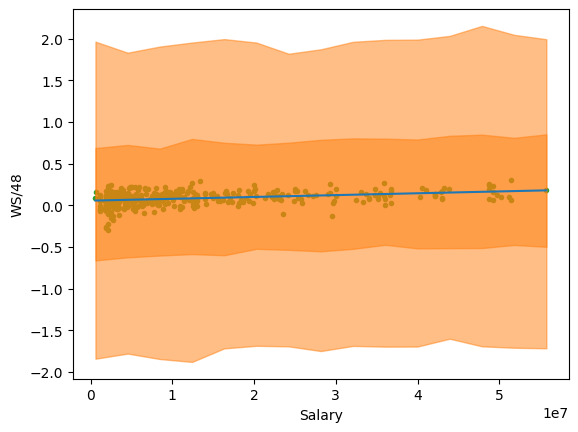

In [16]:
mean_line = idata_ld.posterior["μ"].mean(("chain", "draw"))
salaries = np.random.normal(basketball.Salary.values, 0.01)
idx = np.argsort(salaries)
x = np.linspace(salaries.min(), salaries.max(), 15)
y_pred_q = idata_ld.posterior_predictive["y_pred"].quantile(
    [0.03, 0.97, 0.25, 0.75], dim=["chain", "draw"]
)
y_hat_bounds = iter(
    [
        PchipInterpolator(salaries[idx], y_pred_q[i][idx])(x)
        for i in range(4)
    ]
)

_, ax = plt.subplots()
ax.plot(basketball.Salary, basketball['WS/48'], "C2.", zorder=-3)
ax.plot(basketball.Salary[idx], mean_line[idx], c="C0")

for lb, ub in zip(y_hat_bounds, y_hat_bounds):
    ax.fill_between(x, lb, ub, color="C1", alpha=0.5)

ax.set_xlabel("Salary")
ax.set_ylabel("WS/48")

<Axes: xlabel='y_pred'>

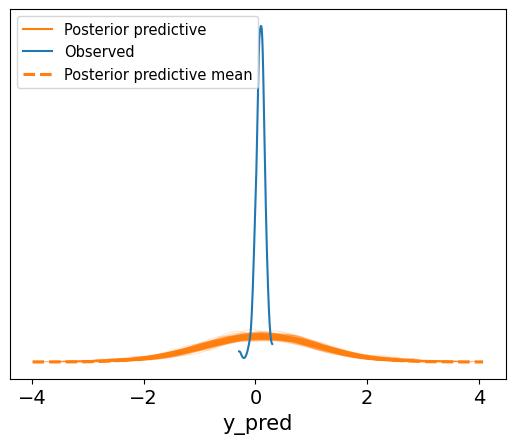

In [17]:
# posterior predictive check
az.plot_ppc(idata_ld, num_pp_samples=200, colors=["C1", "C0", "C1"])

Ok so that still didn't work. Let's try and see what happened

array([<Axes: title={'center': 'γ'}>, <Axes: title={'center': 'δ'}>,
       <Axes: title={'center': 'ε'}>], dtype=object)

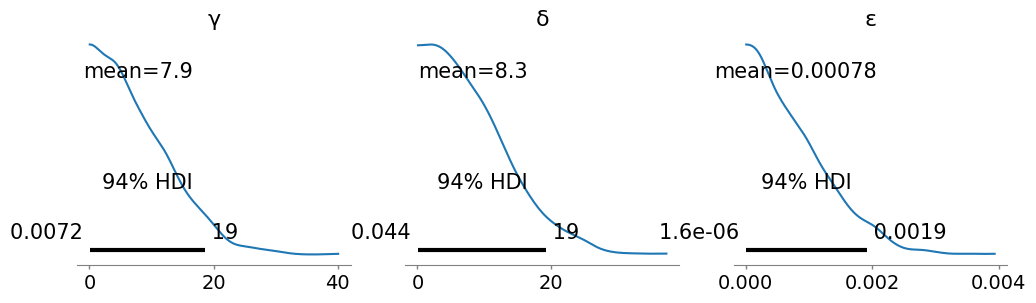

In [21]:
az.plot_posterior(idata_ld, var_names=["γ","δ","ε"], figsize=(12, 3))

So, none of the variables that i tried to incorporate wound up stabilizing. I do not really understand why though. It seems like my experiment did not succeed. However, the original model was all around decent.

In conclusion, I think that this project was in some sense doomed from the start, because I don't believe there is that much causality between the two variables i set out to study. Despite this, my initial model was quite succesful. It was able to capture the vague and inclonclusive relationship one would expect based on my data. Additional attempts to improve the model were unsuccessful, but I do think there were some good ideas there, and I would be interested to know a better way of implimenting those ideas. If I were to do this project again, I would pick a less noisy and more interesting dataset.